<a href="https://colab.research.google.com/github/Rishitha744/Twitter-Sentiment-Analysis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (D) Exploratory Data Analysis for Twitter Sentiment 140 dataset

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rishithareddy1811","key":"aceaacb0a644ad2d726288d1ab7e5c02"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d kazanova/sentiment140
!unzip sentiment140.zip


Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
  0% 0.00/80.9M [00:00<?, ?B/s]
100% 80.9M/80.9M [00:00<00:00, 1.04GB/s]
Archive:  sentiment140.zip
replace training.1600000.processed.noemoticon.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: training.1600000.processed.noemoticon.csv  


In [ ]:
!ls

'kaggle (1) (1).json'   sentiment140.zip
'kaggle (1).json'      'training.1600000.processed.noemoticon (1).csv'
 kaggle.json	        training.1600000.processed.noemoticon.csv
 sample_data


In [ ]:
#loading dataset

import pandas as pd

df = pd.read_csv(
    "training.1600000.processed.noemoticon.csv",
    encoding="latin-1",
    header=None,
    names=["sentiment","tweet_id","date","query","user","text"]
)

# keep only positive and negative
df = df[df["sentiment"].isin([0,4])]
df["label"] = (df["sentiment"] == 4).astype(int)

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (1600000, 7)


,sentiment,tweet_id,date,query,user,text,label
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,0
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,0
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,0
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",0


In [ ]:
print("Missing values:\n", df.isna().sum())
print("\nDuplicate tweets:", df["text"].duplicated().sum())


Missing values:
 sentiment    0
tweet_id     0
date         0
query        0
user         0
text         0
label        0
dtype: int64

Duplicate tweets: 18534


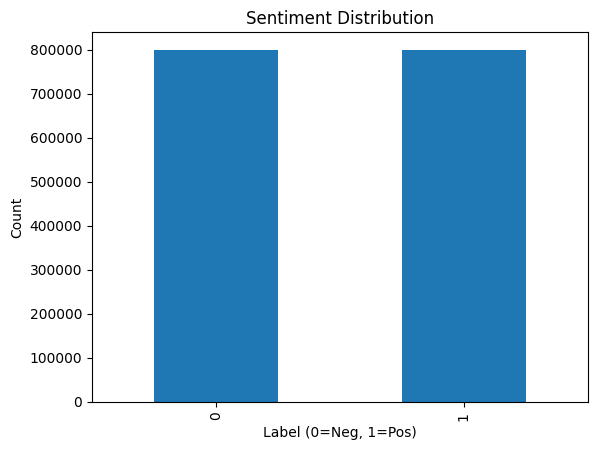

In [ ]:
#plotting labels (0 to 4 converted to binary label)

import matplotlib.pyplot as plt

df["label"].value_counts().plot(kind="bar")
plt.title("Sentiment Distribution")
plt.xlabel("Label (0=Neg, 1=Pos)")
plt.ylabel("Count")
plt.show()


In [ ]:
#cleaning tweets text

import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#", "", text)
    return text

df["text_clean"] = df["text"].apply(clean_text)


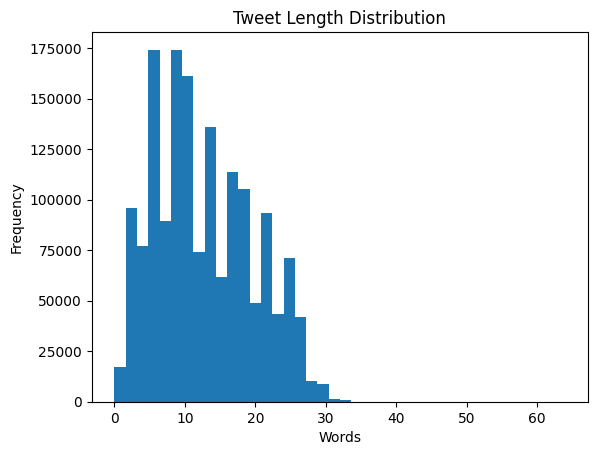

In [ ]:
#Tweet length distribution and plots

df["word_len"] = df["text_clean"].apply(lambda x: len(x.split()))

df["word_len"].describe()


plt.hist(df["word_len"], bins=40)
plt.title("Tweet Length Distribution")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


In [ ]:
#Text mining EDA (Using sampling)

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

sample_df = df.sample(200000, random_state=42)

vectorizer = CountVectorizer(stop_words="english", max_features=20000)
X = vectorizer.fit_transform(sample_df["text_clean"])

word_counts = np.asarray(X.sum(axis=0)).flatten()
words = vectorizer.get_feature_names_out()

top_idx = word_counts.argsort()[-20:][::-1]
[(words[i], word_counts[i]) for i in top_idx]


[('just', np.int64(15726)),
 ('good', np.int64(11454)),
 ('day', np.int64(10772)),
 ('like', np.int64(9920)),
 ('quot', np.int64(9165)),
 ('today', np.int64(8567)),
 ('love', np.int64(8101)),
 ('work', np.int64(8067)),
 ('going', np.int64(8051)),
 ('got', np.int64(7583)),
 ('lol', np.int64(7444)),
 ('time', np.int64(7231)),
 ('know', np.int64(6502)),
 ('im', np.int64(6375)),
 ('don', np.int64(6306)),
 ('really', np.int64(6291)),
 ('amp', np.int64(6058)),
 ('night', np.int64(5485)),
 ('want', np.int64(5306)),
 ('new', np.int64(5269))]

In [ ]:
#TF-IDF Sparsity check

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words="english", max_features=50000)
X_tfidf = tfidf.fit_transform(sample_df["text_clean"])

sparsity = 1 - (X_tfidf.nnz / (X_tfidf.shape[0] * X_tfidf.shape[1]))

print("TF-IDF Shape:", X_tfidf.shape)
print("Sparsity:", round(sparsity,4))


TF-IDF Shape: (200000, 50000)
Sparsity: 0.9999


## (D) EDA Summary

- The dataset contains a large number of tweets with sentiment labels, and the distribution between positive and negative tweets looks balanced based on the bar chart.
- There are no missing values in the main columns, but around 18K duplicate tweets exist, which shows that some users may post similar content multiple times.
- From the tweet length histogram, most tweets are short, usually under 30 words, which is expected for Twitter data.
- The most frequent words include common terms like "just", "good", "day", "love", and "work". This shows that everyday language appears often in tweets.
- The TF-IDF matrix has very high sparsity (around 0.9999), meaning most features are zero because tweets are short and vocabulary is large.
- This observation motivates trying a beyond-course technique such as transformer-based embeddings, which may capture deeper context compared to traditional text mining methods.
